### M3: Time Series Decomposition Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##### First, I load in the data and test to see that the data frame loaded correctly

In [109]:
dfcons = pd.read_csv('C:\\Users\\tfatale\\CTBA\\CTBA\\M3\\ConstructionTimeSeriesDatav2.csv')
dfcons.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [110]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
5,6,Jun-02,77182,57801,19381
6,7,Jul-02,78863,58494,20369
7,8,Aug-02,79460,57953,21507
8,9,Sep-02,76542,55157,21385
9,10,Oct-02,75710,56023,19687


##### Next, I will plot the data to see the initial graph that will need decomposition

Text(147,47000,'Private')

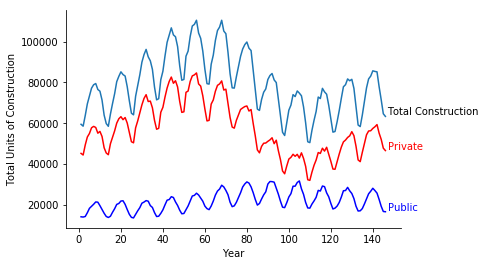

In [111]:
fig,ax = plt.subplots()
ax.plot(dfcons['Month'],dfcons['Total Construction'], label='Total')
ax.plot(dfcons['Month'],dfcons['Public Construction'], color='b', label='Public')
ax.plot(dfcons['Month'],dfcons['Private Construction'], color='r', label='Private')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(147,64000,'Total Construction',color='k')
ax.text(147,17000,'Public',color='b')
ax.text(147,47000,'Private',color='r')

##### Now, I need to compute the squared error of my model, R for Private Construction

In [113]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2
    
dfcons['MovAvgPrivate'] = np.NaN
dfcons['sqErrPrivate'] = np.NaN

In [114]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate
0,1,Jan-02,59516,45273,14243,NaN,NaN
1,2,Feb-02,58588,44475,14113,NaN,NaN
2,3,Mar-02,63782,49396,14386,NaN,NaN
3,4,Apr-02,69504,53283,16221,NaN,NaN
4,5,May-02,73384,55009,18375,NaN,NaN
5,6,Jun-02,77182,57801,19381,NaN,NaN
6,7,Jul-02,78863,58494,20369,NaN,NaN
7,8,Aug-02,79460,57953,21507,NaN,NaN
8,9,Sep-02,76542,55157,21385,NaN,NaN
9,10,Oct-02,75710,56023,19687,NaN,NaN


##### Changing the DataFrame index to DatetimeIndex data type is required for using one of the functions below

In [116]:
dfcons.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(dfcons['Private Construction']))

In [117]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate
2002-01-31,1,Jan-02,59516,45273,14243,NaN,NaN
2002-02-28,2,Feb-02,58588,44475,14113,NaN,NaN
2002-03-31,3,Mar-02,63782,49396,14386,NaN,NaN
2002-04-30,4,Apr-02,69504,53283,16221,NaN,NaN
2002-05-31,5,May-02,73384,55009,18375,NaN,NaN
2002-06-30,6,Jun-02,77182,57801,19381,NaN,NaN
2002-07-31,7,Jul-02,78863,58494,20369,NaN,NaN
2002-08-31,8,Aug-02,79460,57953,21507,NaN,NaN
2002-09-30,9,Sep-02,76542,55157,21385,NaN,NaN
2002-10-31,10,Oct-02,75710,56023,19687,NaN,NaN


In [140]:
window = 3
window = window - window % 2

#####  Computing the moving average in the loop 

In [141]:
for i in range(int(window/2),dfcons.shape[0]-int(window/2)):
    dfcons.loc[dfcons.index[i],'MovAvgPrivate'] = (0.5*dfcons.iloc[i - int(window/2)]['Private Construction'] + dfcons.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfcons.iloc[i + int(window/2)]['Private Construction'])/float(window)

dfcons['sqErrPrivate'] = (dfcons['Private Construction'] - dfcons['MovAvgPrivate'])**2

In [142]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate
2002-01-31,1,Jan-02,59516,45273,14243,NaN,NaN
2002-02-28,2,Feb-02,58588,44475,14113,45904.75,2.044185e+06
2002-03-31,3,Mar-02,63782,49396,14386,49137.50,6.682225e+04
2002-04-30,4,Apr-02,69504,53283,16221,52742.75,2.918701e+05
2002-05-31,5,May-02,73384,55009,18375,55275.50,7.102225e+04
2002-06-30,6,Jun-02,77182,57801,19381,57276.25,2.753626e+05
2002-07-31,7,Jul-02,78863,58494,20369,58185.50,9.517225e+04
2002-08-31,8,Aug-02,79460,57953,21507,57389.25,3.178141e+05
2002-09-30,9,Sep-02,76542,55157,21385,56072.50,8.381402e+05
2002-10-31,10,Oct-02,75710,56023,19687,55188.75,6.959731e+05


##### The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis


In [143]:
dfcons.dropna(how='any',inplace=True)

Average Squared Error per Month:  778809.6857638889
            Month Month-Year  Total Construction  Private Construction  \
2002-02-28      2     Feb-02               58588                 44475   
2002-03-31      3     Mar-02               63782                 49396   
2002-04-30      4     Apr-02               69504                 53283   
2002-05-31      5     May-02               73384                 55009   
2002-06-30      6     Jun-02               77182                 57801   
2002-07-31      7     Jul-02               78863                 58494   
2002-08-31      8     Aug-02               79460                 57953   
2002-09-30      9     Sep-02               76542                 55157   
2002-10-31     10     Oct-02               75710                 56023   
2002-11-30     11     Nov-02               71362                 53552   
2002-12-31     12     Dec-02               63984                 48023   
2003-01-31     13     Jan-03               59877            

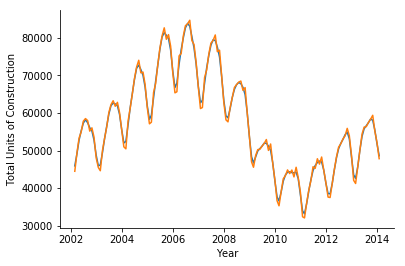

In [144]:
fig,ax = plt.subplots()
ax.plot(dfcons['MovAvgPrivate'],label='Moving Avg. Private Construction')
ax.plot(dfcons['Private Construction'],label='Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfcons['sqErrPrivate'])/len(dfcons))
print(dfcons)

##### Now, I need to compute the squared error of my model, R for Public Construction

In [145]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvgPublic'])**2
    
dfcons['MovAvgPublic'] = np.NaN
dfcons['sqErrPublic'] = np.NaN

In [146]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate,MovAvgPublic,sqErrPublic
2002-02-28,2,Feb-02,58588,44475,14113,45904.75,2.044185e+06,NaN,NaN
2002-03-31,3,Mar-02,63782,49396,14386,49137.50,6.682225e+04,NaN,NaN
2002-04-30,4,Apr-02,69504,53283,16221,52742.75,2.918701e+05,NaN,NaN
2002-05-31,5,May-02,73384,55009,18375,55275.50,7.102225e+04,NaN,NaN
2002-06-30,6,Jun-02,77182,57801,19381,57276.25,2.753626e+05,NaN,NaN
2002-07-31,7,Jul-02,78863,58494,20369,58185.50,9.517225e+04,NaN,NaN
2002-08-31,8,Aug-02,79460,57953,21507,57389.25,3.178141e+05,NaN,NaN
2002-09-30,9,Sep-02,76542,55157,21385,56072.50,8.381402e+05,NaN,NaN
2002-10-31,10,Oct-02,75710,56023,19687,55188.75,6.959731e+05,NaN,NaN
2002-11-30,11,Nov-02,71362,53552,17810,52787.50,5.844602e+05,NaN,NaN


##### Changing the DataFrame index to DatetimeIndex data type is required for using one of the functions below

In [147]:
dfcons.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(dfcons['Public Construction']))

In [148]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate,MovAvgPublic,sqErrPublic
2002-01-31,2,Feb-02,58588,44475,14113,45904.75,2.044185e+06,NaN,NaN
2002-02-28,3,Mar-02,63782,49396,14386,49137.50,6.682225e+04,NaN,NaN
2002-03-31,4,Apr-02,69504,53283,16221,52742.75,2.918701e+05,NaN,NaN
2002-04-30,5,May-02,73384,55009,18375,55275.50,7.102225e+04,NaN,NaN
2002-05-31,6,Jun-02,77182,57801,19381,57276.25,2.753626e+05,NaN,NaN
2002-06-30,7,Jul-02,78863,58494,20369,58185.50,9.517225e+04,NaN,NaN
2002-07-31,8,Aug-02,79460,57953,21507,57389.25,3.178141e+05,NaN,NaN
2002-08-31,9,Sep-02,76542,55157,21385,56072.50,8.381402e+05,NaN,NaN
2002-09-30,10,Oct-02,75710,56023,19687,55188.75,6.959731e+05,NaN,NaN
2002-10-31,11,Nov-02,71362,53552,17810,52787.50,5.844602e+05,NaN,NaN


In [149]:
window = 3
window = window - window % 2

##### Computing the moving average in the loop

In [150]:
for i in range(int(window/2),dfcons.shape[0]-int(window/2)):
    dfcons.loc[dfcons.index[i],'MovAvgPublic'] = (0.5*dfcons.iloc[i - int(window/2)]['Public Construction'] + dfcons.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfcons.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfcons['sqErrPublic'] = (dfcons['Public Construction'] - dfcons['MovAvgPublic'])**2

In [151]:
dfcons

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate,MovAvgPublic,sqErrPublic
2002-01-31,2,Feb-02,58588,44475,14113,45904.75,2.044185e+06,NaN,NaN
2002-02-28,3,Mar-02,63782,49396,14386,49137.50,6.682225e+04,14776.50,152490.2500
2002-03-31,4,Apr-02,69504,53283,16221,52742.75,2.918701e+05,16300.75,6360.0625
2002-04-30,5,May-02,73384,55009,18375,55275.50,7.102225e+04,18088.00,82369.0000
2002-05-31,6,Jun-02,77182,57801,19381,57276.25,2.753626e+05,19376.50,20.2500
2002-06-30,7,Jul-02,78863,58494,20369,58185.50,9.517225e+04,20406.50,1406.2500
2002-07-31,8,Aug-02,79460,57953,21507,57389.25,3.178141e+05,21192.00,99225.0000
2002-08-31,9,Sep-02,76542,55157,21385,56072.50,8.381402e+05,20991.00,155236.0000
2002-09-30,10,Oct-02,75710,56023,19687,55188.75,6.959731e+05,19642.25,2002.5625
2002-10-31,11,Nov-02,71362,53552,17810,52787.50,5.844602e+05,17817.00,49.0000


##### The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis

In [152]:
dfcons.dropna(how='any',inplace=True)

Average Squared Error per Month:  143445.7676056338
            Month Month-Year  Total Construction  Private Construction  \
2002-02-28      3     Mar-02               63782                 49396   
2002-03-31      4     Apr-02               69504                 53283   
2002-04-30      5     May-02               73384                 55009   
2002-05-31      6     Jun-02               77182                 57801   
2002-06-30      7     Jul-02               78863                 58494   
2002-07-31      8     Aug-02               79460                 57953   
2002-08-31      9     Sep-02               76542                 55157   
2002-09-30     10     Oct-02               75710                 56023   
2002-10-31     11     Nov-02               71362                 53552   
2002-11-30     12     Dec-02               63984                 48023   
2002-12-31     13     Jan-03               59877                 45473   
2003-01-31     14     Feb-03               58526            

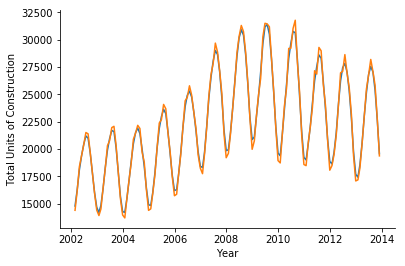

In [153]:
fig,ax = plt.subplots()
ax.plot(dfcons['MovAvgPublic'],label='Moving Avg. Public Construction')
ax.plot(dfcons['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfcons['sqErrPublic'])/len(dfcons))
print(dfcons)

##### I will now try to find the R2Private  and R2Private error for Private construction vs Total Construction

In [154]:
dfcons['R1Private'] = dfcons['Private Construction'] - dfcons['MovAvgPrivate']
dfcons['R1ErrorPrivate'] = abs((dfcons['Private Construction'] - dfcons['R1Private'])/dfcons['Private Construction'])
dfcons.style.format({
    'MovAvgPrivate': '{:.1f}'.format,
    'sqErrPrivate': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,sqErrPrivate,MovAvgPublic,sqErrPublic,R1Private,R1ErrorPrivate
2002-02-28 00:00:00,3,Mar-02,63782,49396,14386,49137.5,"66,822.2",14776.5,152490,258.5,0.995
2002-03-31 00:00:00,4,Apr-02,69504,53283,16221,52742.8,"291,870.1",16300.8,6360.06,540.2,0.990
2002-04-30 00:00:00,5,May-02,73384,55009,18375,55275.5,"71,022.2",18088,82369,-266.5,1.005
2002-05-31 00:00:00,6,Jun-02,77182,57801,19381,57276.2,"275,362.6",19376.5,20.25,524.8,0.991
2002-06-30 00:00:00,7,Jul-02,78863,58494,20369,58185.5,"95,172.2",20406.5,1406.25,308.5,0.995
2002-07-31 00:00:00,8,Aug-02,79460,57953,21507,57389.2,"317,814.1",21192,99225,563.8,0.990
2002-08-31 00:00:00,9,Sep-02,76542,55157,21385,56072.5,"838,140.2",20991,155236,-915.5,1.017
2002-09-30 00:00:00,10,Oct-02,75710,56023,19687,55188.8,"695,973.1",19642.2,2002.56,834.2,0.985
2002-10-31 00:00:00,11,Nov-02,71362,53552,17810,52787.5,"584,460.2",17817,49,764.5,0.986
2002-11-30 00:00:00,12,Dec-02,63984,48023,15961,48767.8,"554,652.6",16034,5329,-744.8,1.016


##### Now, I will plot and compute the average residual construction pattern

Average Residual:  16.242957746478872


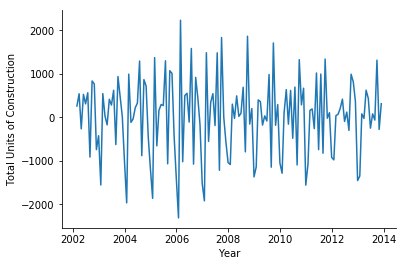

In [155]:
fig,ax = plt.subplots()
ax.plot(dfcons['R1Private'])
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfcons['R1Private'])/len(dfcons))

##### I need to compute the cyclical component

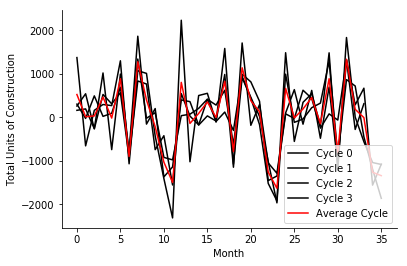

In [165]:
period = 36
cycleLen = period
numCycles = int(len(dfcons)/cycleLen + 0.5)
cycles = [dfcons.iloc[range(i*period,min((i+1)*period,len(dfcons)))]['R1Private'] for i in range(numCycles)]
ptsInCycles = [dfcons.iloc[range(i,len(dfcons['R1Private']),period)]['R1Private'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

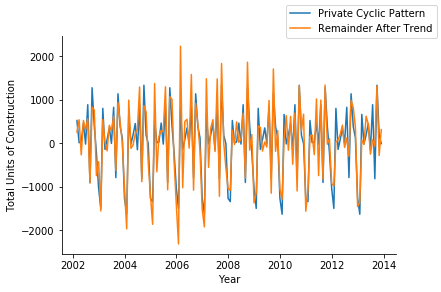

In [158]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfcons)/cycleLen + 0.5)
dfcons['CPrivate'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfcons)):
    dfcons.loc[dfcons.index[i], 'CPrivate'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfcons['CPrivate'],label='Private Cyclic Pattern')
ax.plot(dfcons['R1Private'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.004273243823488054
            Month Month-Year  Total Construction  Private Construction  \
2002-02-28      3     Mar-02               63782                 49396   
2002-03-31      4     Apr-02               69504                 53283   
2002-04-30      5     May-02               73384                 55009   
2002-05-31      6     Jun-02               77182                 57801   
2002-06-30      7     Jul-02               78863                 58494   
2002-07-31      8     Aug-02               79460                 57953   
2002-08-31      9     Sep-02               76542                 55157   
2002-09-30     10     Oct-02               75710                 56023   
2002-10-31     11     Nov-02               71362                 53552   
2002-11-30     12     Dec-02               63984                 48023   
2002-12-31     13     Jan-03               59877                 45473   
2003-01-31     14     Feb-03               58526                 44620   
2

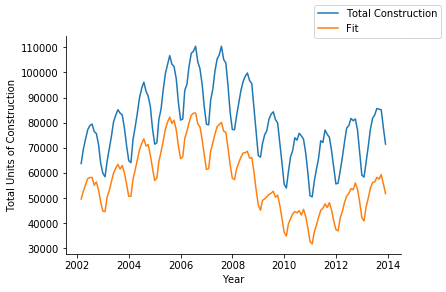

In [160]:
dfcons['R2Private'] = dfcons['R1Private'] - dfcons['CPrivate']
dfcons['R2ErrorPrivate'] = abs(dfcons['R2Private']/dfcons['Total Construction'])
dfcons['fitPrivate'] = dfcons['MovAvgPrivate'] + dfcons['CPrivate']
dfcons.drop(['sqErrPrivate'],axis=1,inplace=True)
print('Average Error: ', sum(dfcons['R2ErrorPrivate'])/len(dfcons))
print(dfcons)
fig,ax = plt.subplots()
ax.plot(dfcons['Total Construction'],label='Total Construction')
ax.plot(dfcons['fitPrivate'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     -0.5541997820021894
Correlation, lag  2     0.15976373204872668
Correlation, lag  3     -0.12925344854668416
Correlation, lag  4     0.10829695502644343
Correlation, lag  5     -0.06040673224651854
Correlation, lag  6     -0.07182132891327969
Correlation, lag  7     -0.016343176760752136
Correlation, lag  8     0.1098694201892299
Correlation, lag  9     -0.1401688408392431
Correlation, lag  10     0.13730111349377394
Correlation, lag  11     -0.2953974172423311
Correlation, lag  12     0.5468139250047577
Correlation, lag  13     -0.4065738748899064
Correlation, lag  14     0.2541027003254099
Correlation, lag  15     -0.1887564458100803
Correlation, lag  16     0.14098027485621045
Correlation, lag  17     -0.07731525778860018
Correlation, lag  18     -0.07013257694251757
Correlation, lag  19     -0.0055001551791811504
Correlation, lag  20     0.1157481271685907
Correlation, lag  21     -0.06493082595065526
Correlation, lag  22     -0.045367691936133894
Correlatio

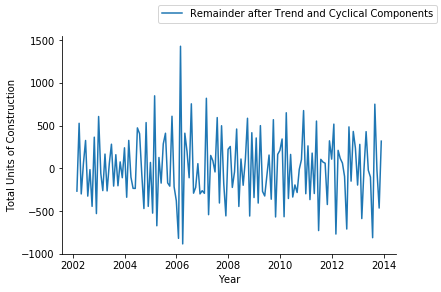

In [161]:
fig,ax = plt.subplots()
ax.plot(dfcons['R2Private'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfcons['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

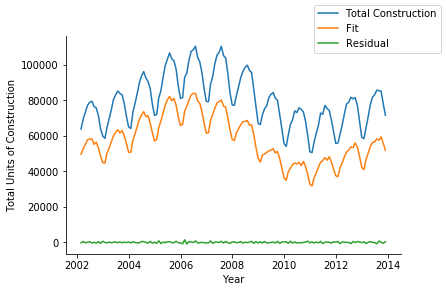

In [162]:
fig,ax = plt.subplots()
ax.plot(dfcons['Total Construction'],label='Total Construction')
ax.plot(dfcons['fitPrivate'],label='Fit')
ax.plot(dfcons['R2Private'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

##### I will now try to find the R2Public  and R2Public error for Public construction vs Total Construction

In [163]:
dfcons['R1Public'] = dfcons['Public Construction'] - dfcons['MovAvgPublic']
dfcons['R1ErrorPublic'] = abs((dfcons['Public Construction'] - dfcons['R1Public'])/dfcons['Public Construction'])
dfcons.style.format({
    'MovAvgPublic': '{:.1f}'.format,
    'sqErrPublic': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1ErrorPublic': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,MovAvgPublic,sqErrPublic,R1Private,R1ErrorPrivate,CPrivate,R2Private,R2ErrorPrivate,fitPrivate,R1Public,R1ErrorPublic
2002-02-28 00:00:00,3,Mar-02,63782,49396,14386,49137.5,14776.5,"152,490.2",258.5,0.994767,523.125,-264.625,0.0041489,49660.6,-390.5,1.027
2002-03-31 00:00:00,4,Apr-02,69504,53283,16221,52742.8,16300.8,"6,360.1",540.25,0.989861,12.0625,528.188,0.00759938,52754.8,-79.8,1.005
2002-04-30 00:00:00,5,May-02,73384,55009,18375,55275.5,18088.0,"82,369.0",-266.5,1.00484,30.75,-297.25,0.00405061,55306.2,287.0,0.984
2002-05-31 00:00:00,6,Jun-02,77182,57801,19381,57276.2,19376.5,20.2,524.75,0.990921,464.375,60.375,0.000782242,57740.6,4.5,1.000
2002-06-30 00:00:00,7,Jul-02,78863,58494,20369,58185.5,20406.5,"1,406.2",308.5,0.994726,-18.875,327.375,0.00415119,58166.6,-37.5,1.002
2002-07-31 00:00:00,8,Aug-02,79460,57953,21507,57389.2,21192.0,"99,225.0",563.75,0.990272,886.562,-322.812,0.00406258,58275.8,315.0,0.985
2002-08-31 00:00:00,9,Sep-02,76542,55157,21385,56072.5,20991.0,"155,236.0",-915.5,1.0166,-902.188,-13.3125,0.000173924,55170.3,394.0,0.982
2002-09-30 00:00:00,10,Oct-02,75710,56023,19687,55188.8,19642.2,"2,002.6",834.25,0.985109,1276.81,-442.562,0.0058455,56465.6,44.8,0.998
2002-10-31 00:00:00,11,Nov-02,71362,53552,17810,52787.5,17817.0,49.0,764.5,0.985724,398.5,366,0.00512878,53186,-7.0,1.000
2002-11-30 00:00:00,12,Dec-02,63984,48023,15961,48767.8,16034.0,"5,329.0",-744.75,1.01551,-217.812,-526.938,0.00823546,48549.9,-73.0,1.005


##### Now, I will plot and compute the average residual construction pattern

Average Residual:  4.943661971830986


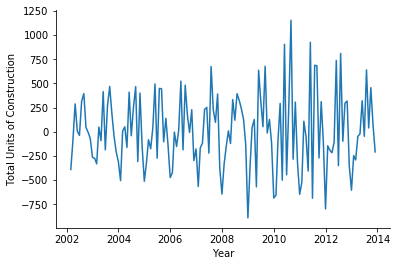

In [164]:
fig,ax = plt.subplots()
ax.plot(dfcons['R1Public'])
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfcons['R1Public'])/len(dfcons))

##### I need to compute the cyclical component

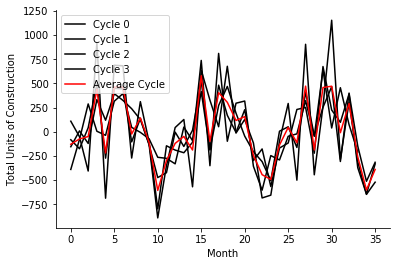

In [166]:
period = 36
cycleLen = period
numCycles = int(len(dfcons)/cycleLen + 0.5)
cycles = [dfcons.iloc[range(i*period,min((i+1)*period,len(dfcons)))]['R1Public'] for i in range(numCycles)]
ptsInCycles = [dfcons.iloc[range(i,len(dfcons['R1Public']),period)]['R1Public'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

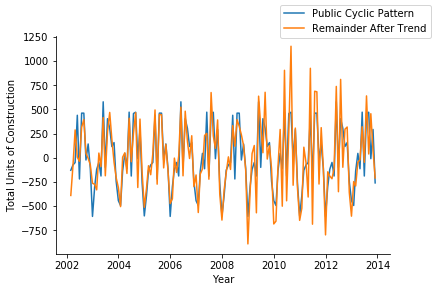

In [167]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfcons)/cycleLen + 0.5)
dfcons['CPublic'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfcons)):
    dfcons.loc[dfcons.index[i], 'CPublic'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfcons['CPublic'],label='Public Cyclic Pattern')
ax.plot(dfcons['R1Public'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.0020663697698632823
            Month Month-Year  Total Construction  Private Construction  \
2002-02-28      3     Mar-02               63782                 49396   
2002-03-31      4     Apr-02               69504                 53283   
2002-04-30      5     May-02               73384                 55009   
2002-05-31      6     Jun-02               77182                 57801   
2002-06-30      7     Jul-02               78863                 58494   
2002-07-31      8     Aug-02               79460                 57953   
2002-08-31      9     Sep-02               76542                 55157   
2002-09-30     10     Oct-02               75710                 56023   
2002-10-31     11     Nov-02               71362                 53552   
2002-11-30     12     Dec-02               63984                 48023   
2002-12-31     13     Jan-03               59877                 45473   
2003-01-31     14     Feb-03               58526                 44620   


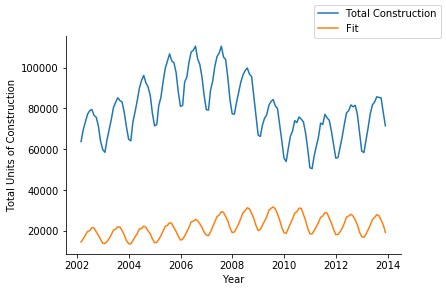

In [168]:
dfcons['R2Public'] = dfcons['R1Public'] - dfcons['CPublic']
dfcons['R2ErrorPublic'] = abs(dfcons['R2Public']/dfcons['Total Construction'])
dfcons['fitPublic'] = dfcons['MovAvgPublic'] + dfcons['CPublic']
dfcons.drop(['sqErrPublic'],axis=1,inplace=True)
print('Average Error: ', sum(dfcons['R2ErrorPublic'])/len(dfcons))
print(dfcons)
fig,ax = plt.subplots()
ax.plot(dfcons['Total Construction'],label='Total Construction')
ax.plot(dfcons['fitPublic'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     -0.5446013933109384
Correlation, lag  2     -0.02980536538704312
Correlation, lag  3     0.27975189314808724
Correlation, lag  4     -0.27625589495782427
Correlation, lag  5     0.07553995712574867
Correlation, lag  6     0.12373735225730967
Correlation, lag  7     -0.24551978296507906
Correlation, lag  8     -0.033314963824622616
Correlation, lag  9     0.3721917961717743
Correlation, lag  10     -0.4407096037242531
Correlation, lag  11     0.09694590686678094
Correlation, lag  12     0.4348025897915876
Correlation, lag  13     -0.6107257225024092
Correlation, lag  14     0.514090259938868
Correlation, lag  15     -0.1500677419106394
Correlation, lag  16     -0.16385365295331789
Correlation, lag  17     0.20739906482976422
Correlation, lag  18     -0.009511393171803512
Correlation, lag  19     -0.24178754961526344
Correlation, lag  20     0.18772046095069464
Correlation, lag  21     -0.006173939877333699
Correlation, lag  22     -0.3162775247154603
Correlation,

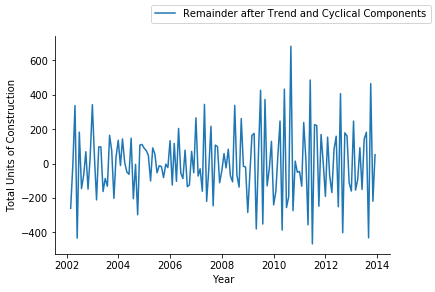

In [169]:
fig,ax = plt.subplots()
ax.plot(dfcons['R2Public'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfcons['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

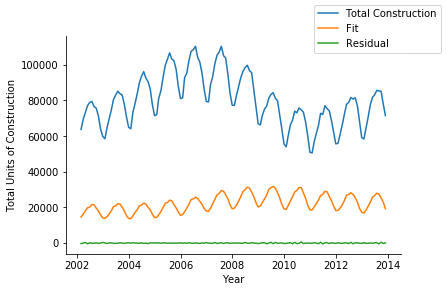

In [170]:
fig,ax = plt.subplots()
ax.plot(dfcons['Total Construction'],label='Total Construction')
ax.plot(dfcons['fitPublic'],label='Fit')
ax.plot(dfcons['R2Public'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Total Units of Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()